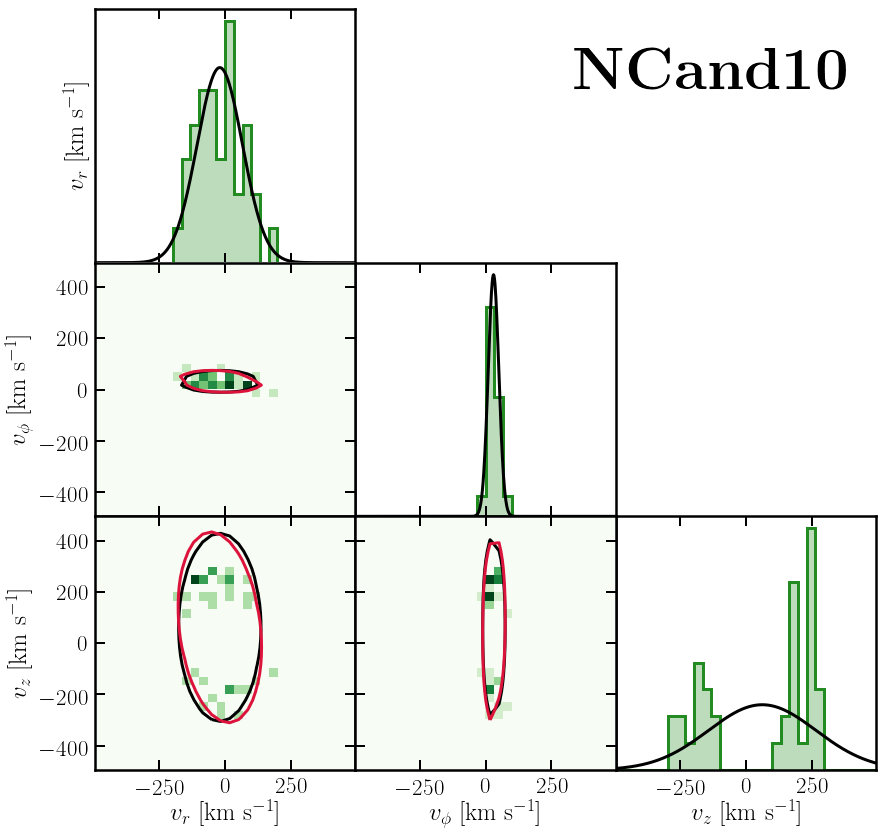

In [178]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec
from LabFuncs import *
from Params import *
from HaloFuncs import *
from WIMPFuncs import *
import pandas


df = pandas.read_csv('../GAIA_SDSS_substructures_next_30_cands.csv')
names = df.group_id.unique()
num_cands = size(names)

i_cand = 10
Cand = df.loc[df['group_id'] == names[i_cand]]
name = names[i_cand]
nstars = size(Cand,0)
vx = Cand.GalRVel
vy = Cand.GalTVel
vz = Cand.GalzVel

# S1 = pandas.read_csv('../S1_only_cat_simple.csv')
# name = 'S1'
# nstars = size(S1,0)
# v = zeros(shape=(nstars,3))
# vx = S1.GalRVel
# vy = S1.GalphiVel
# vz = S1.GalzVel

vx0 = mean(vx)
vy0 = mean(vy)
vz0 = mean(vz)
sigx = std(vx)
sigy = std(vy)
sigz = std(vz)


####

# Set plot rc params
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, axarr = plt.subplots(3, 3,figsize=(14,14))
gs = gridspec.GridSpec(3, 3)
gs.update(wspace=0.0,hspace=0.0)
ax_x = plt.subplot(gs[0,0])
ax_y = plt.subplot(gs[1,1])
ax_z = plt.subplot(gs[2,2])

ax_yx = plt.subplot(gs[1,0])
ax_zx = plt.subplot(gs[2,0])
ax_zy = plt.subplot(gs[2,1])

fig.delaxes(plt.subplot(gs[0,1]))
fig.delaxes(plt.subplot(gs[0,2]))
fig.delaxes(plt.subplot(gs[1,2]))

tit_fontsize = 20
cmap = cm.Greens
col1 = 'ForestGreen'

vmin = -495.0
vmax = 495.0
nbins = 30
levels = [0.2]

vv = linspace(vmin,vmax,nbins)
vfine = linspace(vmin,vmax,1000)
V1,V2 = meshgrid(vv,vv)

def fv_1D(v1):
    v10 = mean(v1)
    sig1 = std(v1)
    fv1 = exp(-(vfine-v10)**2.0/(2*sig1**2.0))
    fv1 /= trapz(fv1,vfine)
    return fv1

def fv_2D(v1,v2):
    v10 = mean(v1)
    v20 = mean(v2)
    sig1 = std(v1)
    sig2 = std(v2)
    return exp(-(V1-v10)**2.0/(2*sig1**2.0) - (V2-v20)**2.0/(2*sig2**2.0))

def fv_2D_tilt(v1,v2):
    v10 = mean(v1)
    v20 = mean(v2)
    Sig_inv= linalg.inv(cov(v1,v2))
    V1o = V1-v10
    V2o = V2-v20
    return exp(-0.5*(V1o**2.0*Sig_inv[0,0]+V2o**2.0*Sig_inv[1,1]+2*V1o*V2o*Sig_inv[1,0]))


# 1D plots
plt.sca(ax_x)
ax_x.hist(vx,range=[vmin,vmax],bins=nbins,color=col1,linewidth=3,alpha=0.3,normed=1)
plt.hist(vx,range=[vmin,vmax],bins=nbins,color=col1,linewidth=3,histtype='step',normed=1)
plt.plot(vfine,fv_1D(vx),'k-',linewidth=3)
plt.xlim([vmin,vmax])
#plt.title(r'$v_r = $'+str(int(vx0))+r'$\pm$'+str(int(sigx))+r' km s$^{-1}',fontsize=tit_fontsize)
plt.ylabel(r'$v_r$ [km s$^{-1}$]',fontsize=25)

plt.sca(ax_y)
ax_y.hist(vy,range=[vmin,vmax],bins=nbins,color=col1,linewidth=3,alpha=0.3,normed=1)
plt.hist(vy,range=[vmin,vmax],bins=nbins,color=col1,linewidth=3,histtype='step',normed=1)
plt.plot(vfine,fv_1D(vy),'k-',linewidth=3)
plt.xlim([vmin,vmax])
#plt.title(r'$v_\phi = $'+str(int(vy0))+r'$\pm$'+str(int(sigy))+r' km s$^{-1}',fontsize=tit_fontsize)


plt.sca(ax_z)
ax_z.hist(vz,range=[vmin,vmax],bins=nbins,color=col1,linewidth=3,alpha=0.3,normed=1)
plt.hist(vz,range=[vmin,vmax],bins=nbins,color=col1,linewidth=3,histtype='step',normed=1)
plt.plot(vfine,fv_1D(vz),'k-',linewidth=3)
plt.xlim([vmin,vmax])
#plt.title(r'$v_z = $'+str(int(vz0))+r'$\pm$'+str(int(sigz))+r' km s$^{-1}',fontsize=tit_fontsize)
plt.xlabel(r'$v_z$ [km s$^{-1}$]',fontsize=25)


# 2D plots
plt.sca(ax_yx)
ax_yx.hist2d(vx,vy,range=[[vmin, vmax], [vmin, vmax]],bins=nbins,cmap=cmap)
ax_yx.contour(vv,vv,fv_2D(vx,vy),levels=levels,colors='k',linewidths=3)
ax_yx.contour(vv,vv,fv_2D_tilt(vx,vy),levels=levels,colors='Crimson',linewidths=3)
plt.ylabel(r'$v_\phi$ [km s$^{-1}$]',fontsize=25)

plt.sca(ax_zx)
ax_zx.hist2d(vx,vz,range=[[vmin, vmax], [vmin, vmax]],bins=nbins,cmap=cmap)
ax_zx.contour(vv,vv,fv_2D(vx,vz),levels=levels,colors='k',linewidths=3)
ax_zx.contour(vv,vv,fv_2D_tilt(vx,vz),levels=levels,colors='Crimson',linewidths=3)
plt.xlabel(r'$v_r$ [km s$^{-1}$]',fontsize=25)
plt.ylabel(r'$v_z$ [km s$^{-1}$]',fontsize=25)

plt.sca(ax_zy)
ax_zy.hist2d(vy,vz,range=[[vmin, vmax], [vmin, vmax]],bins=nbins,cmap=cmap)
ax_zy.contour(vv,vv,fv_2D(vy,vz),levels=levels,colors='k',linewidths=3)
ax_zy.contour(vv,vv,fv_2D_tilt(vy,vz),levels=levels,colors='Crimson',linewidths=3)
plt.xlabel(r'$v_\phi$ [km s$^{-1}$]',fontsize=25)

# ax1.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
# ax1.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
# ax2.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=33)
# ax2.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
# ax3.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
# ax3.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
# ax4.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
# ax4.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)

ax_x.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
ax_y.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
ax_z.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
ax_zx.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
ax_yx.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
ax_zy.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)

ax_x.set_yticks([])
ax_y.set_yticks([])
ax_z.set_yticks([])
ax_x.set_yticklabels([])
ax_x.set_xticklabels([])
ax_y.set_yticklabels([])
ax_y.set_xticklabels([])
ax_z.set_yticklabels([])
ax_yx.set_xticklabels([])
ax_zy.set_yticklabels([])

plt.gcf().text(0.6, 0.8, r'\bf {'+name+r'}', fontsize=60)

              
plt.show()

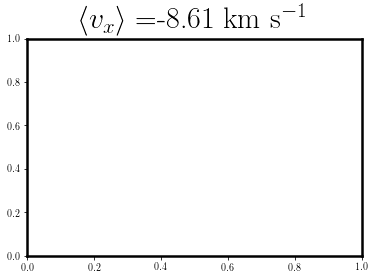

In [114]:
plt.title(r'$\langle v_x \rangle = $'+r'{:.2f}'.format(vx0)+r' km s$^{-1}',fontsize=tit_fontsize)
plt.show()

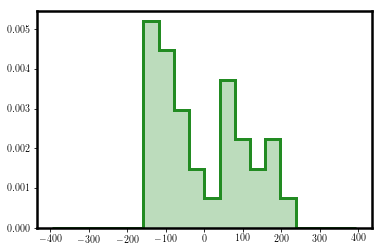

In [99]:
plt.hist(vx,range=[vmin,vmax],bins=nbins,color='ForestGreen',linewidth=3,alpha=0.3,normed=1)
plt.hist(vx,range=[vmin,vmax],bins=nbins,color='ForestGreen',linewidth=3,histtype='step',normed=1)
plt.show()

In [136]:
print r'$v_z = $'+str(int(vz0))+r'$\pm$'+str(int(sigz))+r' km s$^{-1}'

$v_z = $-67$\pm$60 km s$^{-1}


In [158]:
df.columns

Index([u'ra', u'dec', u'pmra', u'pmdec', u'l', u'b', u'psfmag_u',
       u'psfmagerr_u', u'psfmag_g', u'psfmagerr_g', u'psfmag_r',
       u'psfmagerr_r', u'psfmag_i', u'psfmagerr_i', u'psfmag_z',
       u'psfmagerr_z', u'hrv', u'hrv_e', u'logg', u'logg_e', u'teff',
       u'teff_e', u'feh', u'feh_e', u'GalR', u'Galphi', u'Galz', u'Galdist',
       u'GalRecX', u'GalRecY', u'GalRecZ', u'GalU', u'GalV', u'GalW',
       u'GalRVel', u'GalphiVel', u'GalzVel', u'GalTotalVel', u'cand_name'],
      dtype='object')

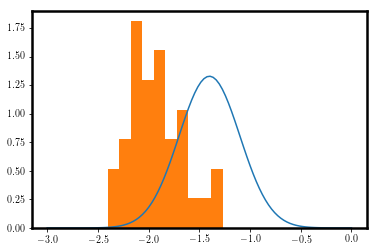

In [171]:
FeHvals = linspace(-3,0,100)
FeH_saus = -1.4
sigFeH_saus = 0.3
dF = exp(-(FeHvals-FeH_saus)**2.0/(2*sigFeH_saus**2.0))
dF = dF/trapz(dF,FeHvals)
plt.plot(FeHvals,dF)
FeH = df.feh
plt.hist(FeH,normed=1)
plt.show()